In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('/data/notebook_files/ICRISAT-District Level Operational Holdings.csv')
# Preview the data
print(df.head)

<bound method NDFrame.head of     Dist Code  Year  State Code State Name    Dist Name  \
0          72  1990           5  Karnataka  Chitradurga   
1          72  1995           5  Karnataka  Chitradurga   
2          72  2000           5  Karnataka  Chitradurga   
3          72  2005           5  Karnataka  Chitradurga   
4          72  2010           5  Karnataka  Chitradurga   
5          73  1990           5  Karnataka      Bellary   
6          73  1995           5  Karnataka      Bellary   
7          73  2000           5  Karnataka      Bellary   
8          73  2005           5  Karnataka      Bellary   
9          73  2010           5  Karnataka      Bellary   
10       1012  2000           5  Karnataka   Davanagere   
11       1012  2005           5  Karnataka   Davanagere   
12       1012  2010           5  Karnataka   Davanagere   
13       1013  1995           5  Karnataka        Gadag   
14       1013  2000           5  Karnataka        Gadag   
15       1013  2005       

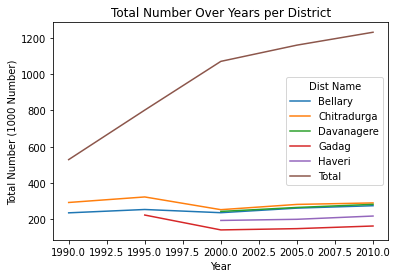

In [4]:
df_pivot = df.pivot(index='Year', columns='Dist Name', values='TOTAL NUMBER (1000 Number)')
df_pivot['Total'] = df_pivot.sum(axis=1)

df_pivot.plot(kind='line', title='Total Number Over Years per District')
plt.xlabel('Year')
plt.ylabel('Total Number (1000 Number)')
plt.show()


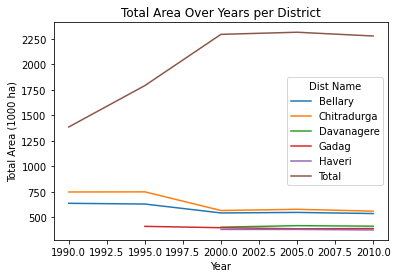

In [5]:
df_pivot = df.pivot(index='Year', columns='Dist Name', values='TOTAL AREA (1000 ha)')
df_pivot['Total'] = df_pivot.sum(axis=1)

df_pivot.plot(kind='line', title='Total Area Over Years per District')
plt.xlabel('Year')
plt.ylabel('Total Area (1000 ha)')
plt.show()

In [6]:
farmer_types = ['MARGINAL', 'SMALL', 'SEMI MEDIUM', 'MEDIUM', 'LARGE']

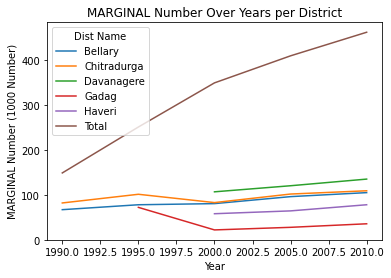

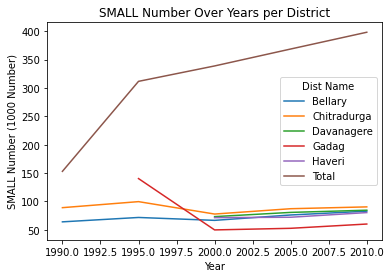

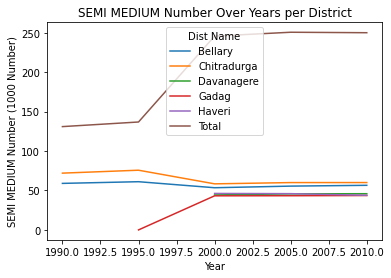

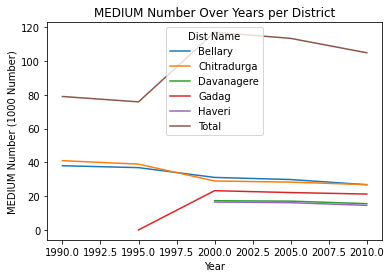

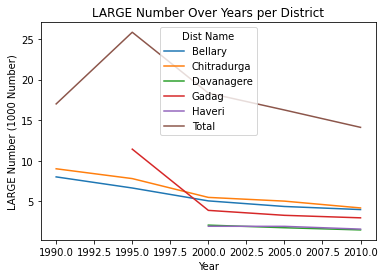

In [7]:
for farmer_type in farmer_types:
    df_pivot = df.pivot(index='Year', columns='Dist Name', values=f'{farmer_type} NUMBER (1000 Number)')
    df_pivot['Total'] = df_pivot.sum(axis=1)
    df_pivot.plot(kind='line', title=f'{farmer_type} Number Over Years per District')
    plt.xlabel('Year')
    plt.ylabel(f'{farmer_type} Number (1000 Number)')
    plt.show()

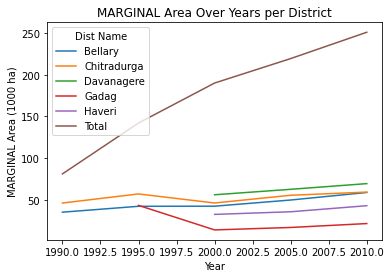

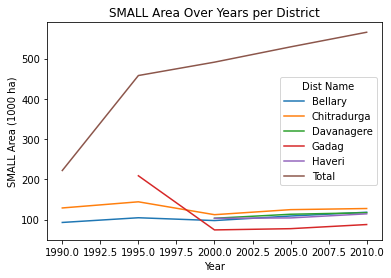

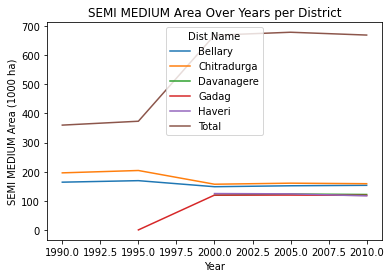

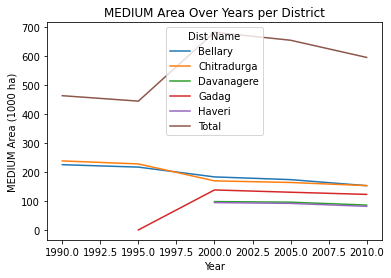

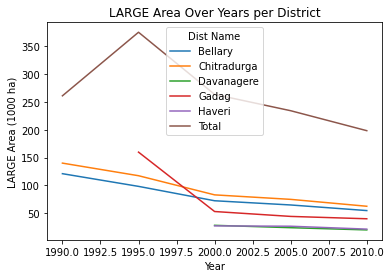

In [8]:
for farmer_type in farmer_types:
    df_pivot = df.pivot(index='Year', columns='Dist Name', values=f'{farmer_type} AREA (1000 ha)')
    df_pivot['Total'] = df_pivot.sum(axis=1)
    df_pivot.plot(kind='line', title=f'{farmer_type} Area Over Years per District')
    plt.xlabel('Year')
    plt.ylabel(f'{farmer_type} Area (1000 ha)')
    plt.show()

In [11]:
# Group data by year and calculate sum for each group
df_totals = df.groupby('Year').sum()

# Reset the index to make 'Year' a column again
df_totals.reset_index(inplace=True)

# Keep only relevant columns
df_totals = df_totals[['Year', 'MARGINAL NUMBER (1000 Number)', 'MARGINAL AREA (1000 ha)', 
                       'SMALL NUMBER (1000 Number)', 'SMALL AREA (1000 ha)', 
                       'SEMI MEDIUM NUMBER (1000 Number)', 'SEMI MEDIUM AREA (1000 ha)', 
                       'MEDIUM NUMBER (1000 Number)', 'MEDIUM AREA (1000 ha)', 
                       'LARGE NUMBER (1000 Number)', 'LARGE AREA (1000 ha)', 
                       'TOTAL NUMBER (1000 Number)', 'TOTAL AREA (1000 ha)']]

# Save the totals dataframe to a new csv file
df_totals.to_csv('farmland.csv', index=False)
print(df_totals.head)

<bound method NDFrame.head of    Year  MARGINAL NUMBER (1000 Number)  MARGINAL AREA (1000 ha)  \
0  1990                         149.00                    81.00   
1  1995                         251.50                   142.16   
2  2000                         350.00                   190.20   
3  2005                         410.36                   219.60   
4  2010                         462.99                   251.24   

   SMALL NUMBER (1000 Number)  SMALL AREA (1000 ha)  \
0                      153.00                222.00   
1                      311.64                457.83   
2                      338.80                491.04   
3                      368.65                528.98   
4                      398.20                565.31   

   SEMI MEDIUM NUMBER (1000 Number)  SEMI MEDIUM AREA (1000 ha)  \
0                            131.00                      360.00   
1                            136.84                      373.32   
2                            245.76

<ipython-input-11-730c3b9986d4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_totals = df.groupby('Year').sum()
